- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

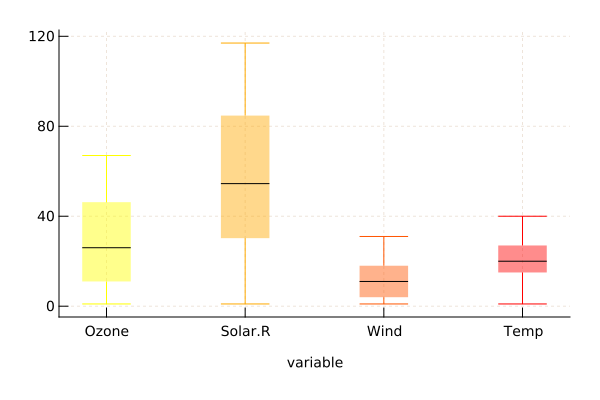

In [1]:
using RDatasets, StatsBase, KernelDensity, Colors
using CairoMakie, ColorSchemes
include("makieTheme6.jl") # don't forget to include the theme

airquality = dataset("datasets", "airquality")
categories = ["Ozone", "Solar.R", "Wind", "Temp"] 

fig = Figure(resolution = (600, 400), font = "sans")
ax = Axis(fig, xlabel = "variable", ylabel = "", xticks = ([1,2,3,4],categories))
colors = ColorScheme(range(colorant"yellow", colorant"red", length=length(categories)))

for (indx,f) in enumerate(categories)
    testm = []
    for v in airquality[:,f]
        if v !== missing
            push!(testm, v)
        end
    end
    a = fill(indx, length(testm))
    b = testm
    boxplot!(a, b; whiskerwidth = 1, width = 0.35,  color = (colors[indx], 0.45), 
            whiskercolor = (colors[indx], 1), mediancolor = :black) #show_outliers=false
end
fig[1,1] = ax
#save("./results/FigAirqualityBox.png", fig, px_per_unit = 2)
fig

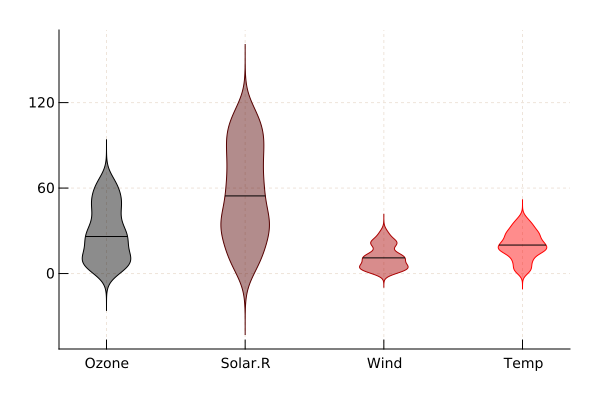

In [2]:
fig = Figure(resolution = (600, 400), font = "sans")
ax = Axis(fig, xlabel = "", ylabel = "", xticks = ([1,2,3,4], categories) )
colors = ColorScheme(range(colorant"black", colorant"red", length=length(categories)))

for (indx,f) in enumerate(categories)
    testm = []
    for v in airquality[:,f]
        if v !== missing
            push!(testm, v)
        end
    end
    a = repeat([indx], inner = length(testm))
    b = testm
    violin!(a, b; width = 0.35,  color = (colors[indx], 0.45), 
        strokecolor = colors[indx], show_median = true, mediancolor = :black)
end
fig[1,1] = ax
#save("./results/FigAirqualityViolin.png", fig, px_per_unit = 2)
fig